# Importación de librerías y carga de datos

In [8]:
"""
Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from boruta import BorutaPy



In [31]:
#path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\PCA_without_powers.csv'.replace('\\','/')
#path=r'C:\Users\Luisa\OneDrive - Universidad de Antioquia\GRUNECO\Doctorado Ximena\pca\sl\PCA_sl.csv'.replace('\\','/')

data=pd.read_csv("Occupancy_Estimation.csv",sep=",")
data = data.drop(["Date","Time"], axis=1)
data

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# Preprocesamiento

## Análisis exploratorio de datos

In [ ]:
data.groupby(by='visit').describe().T

In [ ]:
print(data.dtypes.unique())

In [ ]:
data.select_dtypes('O')

In [ ]:
# data pasa a ser el arreglo únicamente con los datos númericos

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)

data.shape

In [ ]:
data

In [ ]:
# Se elimina la columna, para ponerla al final

# target = data.pop('score')
# data.insert(len(data.columns), target.name, target)
target = data.pop('visit')

#target = data.pop('condition_task')
data.insert(len(data.columns), target.name, target)

In [ ]:
data

## Selección de caracteristicas

### Creación de datasets de entrenamiento y test

In [32]:
data.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [34]:
scaler =StandardScaler()
data_s = scaler.fit_transform(data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope']])
data_s = pd.DataFrame(data_s,columns=data.columns[:-3])
data_s

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.246855,-0.300448,-0.237223,-0.197556,-0.579432,0.004146
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.310008,-0.262923,-0.261400,-0.197556,-0.579432,0.004146
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.183703,-0.262923,-0.237223,-0.197556,-0.579432,0.004146
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.278432,-0.150348,-0.140515,-0.197556,-0.579432,0.004146


In [35]:
data_s[['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']] = data[['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']]

In [36]:
data_s

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,0,0,1
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,0,0,1
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,0,0,1
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,0,0,1
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.246855,-0.300448,-0.237223,-0.197556,-0.579432,0.004146,0,0,0
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.310008,-0.262923,-0.261400,-0.197556,-0.579432,0.004146,0,0,0
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.183703,-0.262923,-0.237223,-0.197556,-0.579432,0.004146,0,0,0
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.278432,-0.150348,-0.140515,-0.197556,-0.579432,0.004146,0,0,0


In [37]:
X = data_s.values[:,:-1]
y = data_s.values[:,-1]
print(X.shape)
print(y.shape)

(10129, 16)
(10129,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.3, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=data_s.values[:,-1]) # que se mantenga la proporcion en la división

In [39]:
X_train, X_val, y_train, y_val = train_test_split(                            
    X_train, # Valores de X
    y_train, # Valores de Y
    test_size=0.33, # Test de 20% cambiar a 30
    random_state=1, # Semilla
    stratify=y_train) 

### Mapa de calor de correlación

<AxesSubplot: >

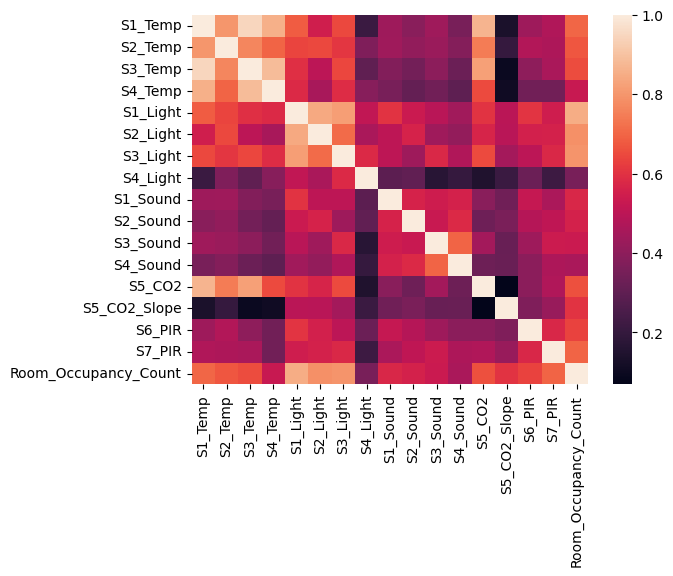

In [40]:
sns.heatmap(data_s.corr())

### Árboles de decisión (Grid Search)

In [41]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 30)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)] # Mayor profundidad y menor cantidad de datos puede generar overfiting
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True]
criterion = ['gini',  'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion
               }

In [42]:
forestclf_grid = RandomForestClassifier()

rf_random = RandomizedSearchCV(
                              estimator=forestclf_grid,
                              param_distributions=random_grid,
                              n_iter=100,
                              cv=5,
                              verbose=2,
                              random_state=10,
                              n_jobs=-1 # todos los nucleos del computador 
                              )

rf_random.fit(X_train, y_train)

# 1. GridSearchCV -> hacer todas las combinaciones posibles 
# 2. Estandarizar o normalizar las métricas para tener rangos que permitan mejorar los resultados-> revisar 
# revisar el pca entrega los datos normalizados
# ISA: desiciontree ->XGBoosting funciones similares a randomforest que tiene métodos de optimización, con gradientes descendientes 
# LU: SMV   

#Modelos de Deep Learning -> construcción de redes neuronales  John -> red pequeña 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
best_selected = rf_random.best_estimator_

In [ ]:
best_selected.fit(X_train, y_train)

In [ ]:
predicted = best_selected.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

In [ ]:
scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )

In [ ]:
print('CV accuracy scores: %s' % scores)

In [ ]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))

In [ ]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_train,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predicted)
print(CM)
import seaborn
seaborn.heatmap(CM,annot=True)
plt.show()

### Árboles de decisión (Boruta)

In [ ]:
feat_selector = BorutaPy(
                        verbose=2,
                        estimator=best_selected,
                        max_iter=100
                        )

In [ ]:
feat_selector.fit(X_train, y_train)

In [ ]:
selected_features = []
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", data.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
        selected_features.append(data.columns[i])

In [ ]:
X_transform = feat_selector.transform(X_train)

In [ ]:
best_selected.fit(X_transform, y_train)

In [ ]:
selected_features = [data.columns.get_loc(c) for c in selected_features if c in data]
selected_features

In [ ]:
predicted = best_selected.predict(X_test[:,selected_features])

In [ ]:
print(
    f"Classification report for classifier {best_selected}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [ ]:
scores = cross_val_score(estimator=best_selected,
                        X=X_transform,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)

In [ ]:
print('CV accuracy scores: %s' % scores)

In [ ]:
print('\nCV accuracy: %.3f +/- %.3f' %
    (np.mean(scores), np.std(scores)))

In [ ]:
train_sizes, train_scores, test_scores = \
    learning_curve(
                  estimator=best_selected,
                  X=X_transform,
                  y=y_train,
                  train_sizes=np.linspace(0.1, 1, 10),
                  cv=10,
                  n_jobs=-1
                  )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
        train_sizes,
        train_mean,
        color='blue',
        marker='o',
        markersize=5,
        label='training accuracy'
        )

plt.fill_between(
                train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue'
                )

plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label='validation accuracy'
        )

plt.fill_between(
                train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15,
                color='green'
                )

plt.grid()
plt.xlabel('number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

### Selección de caracteristicas con árboles de decisión

In [ ]:
nombres_columnas = data.columns[:-1]
best_selected.fit(X_train, y_train)
features_scores = best_selected.feature_importances_
features_scores
index = np.argsort(features_scores)[::-1]
sorted_names = []

for f in range(X_train.shape[1]):

    sorted_names.append(nombres_columnas[index[f]])
    print("%2d) %-*s %f" % (f + 1, 30,
                        nombres_columnas[index[f]],
                        features_scores[index[f]]))
    
plt.title('Importancia de la caracteristica')

plt.bar(range(X_train.shape[1]),
    features_scores[index],
    align='center')

plt.xticks(range(X_train.shape[1]),
    nombres_columnas[index],
    rotation=90)

plt.xlim([-1, 10])

plt.tight_layout()

plt.show()

In [ ]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_selected.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_selected,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### SVM (Grid Search)

In [ ]:
svm_param_grid = {'C': list(np.logspace(-1, 4, 6)), 
                 'gamma': list(np.logspace(-3, 2, 6)) + ['Auto'] + ['scale'],
                 'kernel': ['rbf', 'poly']} 

svc = SVC()
svc_clf = GridSearchCV(
    
                      svc,
                      svm_param_grid,
                      n_jobs=-1,
                      cv=10
                      )

svm_best_clf = svc_clf.fit(X_train, y_train)
best_model = svm_best_clf.best_estimator_

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
predicted = best_model.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )

### SVM (Permutation importance)

In [ ]:
results = permutation_importance(
                                best_model,
                                X_train,
                                y_train,
                                scoring='accuracy'
                                )

nombres_columnas = data.columns[:-1]
importance = results.importances_mean
index = np.argsort(importance)

for v, idx in zip(importance, index):
    
    print(f'Feature: {nombres_columnas[idx]} | Score: {v}')


### SVM con caracteristicas seleccionadas del árbol de decisión

In [ ]:
acc_per_feature = []
std_per_feature = []

for index, feature_name in enumerate(sorted_names,start=1):

    input_features_names = sorted_names[:index]
    input_features_index = [data.columns.get_loc(c) for c 
                      in input_features_names if c in data]
    best_model.fit(X_train[:, input_features_index], y_train)
    scores = cross_val_score(
                        estimator=best_model,
                        X=X_train[:, input_features_index],
                        y=y_train,
                        cv=10,
                        n_jobs=-1
                        )
    acc_per_feature.append(np.mean(scores))
    std_per_feature.append(np.std(scores))

plt.plot(
        range(1, len(sorted_names)),
        acc_per_feature,
        color='red'
        ) 

plt.fill_between(
                range(1, len(sorted_names)),
                acc_per_feature + std_per_feature,
                acc_per_feature - std_per_feature,
                alpha=0.15,
                color='red'
                )

plt.grid()

### XGBoosting

### TPOT

In [ ]:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier()

In [ ]:
pipeline_optimizer = TPOTClassifier(
                                    generations=5,
                                    population_size=int(X.shape[0]*0.4),
                                    cv=10,
                                    random_state=10,
                                    verbosity=3,
                                    n_jobs=-1
                                    )

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

In [ ]:
pipeline_optimizer

In [ ]:
print(pipeline_optimizer.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(X_test, DecisionTreeClassifier__criterion='gini', DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=10, DecisionTreeClassifier__min_samples_split=14)